In [4]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.3483415633836801, 0.40447695035460995, 0.30972468916518653, 0.325187969924812, 0.2792321116928447, 0.34767025089605735, 0.33539823008849556, 0.30876494023904383, 0.3009592326139089, 0.25748502994011974, 0.2656346749226006]


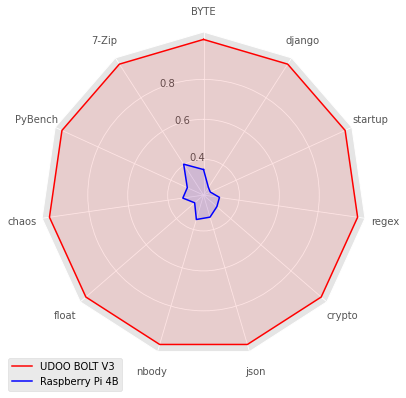

In [9]:
# https://openbenchmarking.org/result/2110255-JNCF-211025851
def example_data():
    data = [
        ['BYTE', '7-Zip', 'PyBench', 'chaos', 'float', 'nbody', 'json', 'crypto', 'regex', 'startup', 'django'],
        [
            [1,1,1,1,1,1,1,1,1,1,1],
            [10726837.0/30794019.8, 
            3650/9024, 
            1395/4504, 
            173.00/532.00, 
            160.00/573.00, 
            194.00/558.00, 
            37.90 /113.00, 
            155.00/502.00, 
            251.00/834.00, 
            12.90/50.10, 
            85.80/323.00]
        ]]
    return data


if __name__ == '__main__':
    plt.style.use("ggplot")
    theta = radar_factory(11, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, ax = plt.subplots(figsize=(6, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    colors = ['r', 'b']
    # Plot the four cases from the example data on separate axes

    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    labels = ('UDOO BOLT V3', 'Raspberry Pi 4B')
    for d, color, label in zip(data[0], colors, labels):
        print(d)
        ax.plot(theta, d, color=color, label=label)
        ax.fill(theta, d, facecolor=color, alpha=0.10)
    ax.set_varlabels(spoke_labels)
    ax.xaxis.set_tick_params(pad=10)
    # add legend relative to top-left plot
    legend = ax.legend(loc=(-0.1, -0.1))
    plt.setp(legend.get_texts(), color='k')
    #plt.grid(True)
    plt.show()
    
    fig.savefig('phoronix-benchmarks.pdf')

In [ ]:
import numpy as np
a = 1/np.array(data[0][1])
print(a, np.average(a), np.std(a))

[2.87074557 2.47232877 3.22867384 3.07514451 3.58125    2.87628866
 2.98153034 3.23870968 3.32270916 3.88372093 3.76456876] 3.2086972926806894 0.399332474478023
